La lecture d’un tutoriel pandas pourra être utile : http://pandas.pydata.org/pandas-docs/stable/tutorials.html.
Nous travaillons sur la base de données Investment Data Set 1 qui peut être téléchargée depuis
https://bitbucket.org/portierf/shared_files/downloads/invest.txt.

Avant de commencer, on réalisera l’exercice 12 du polycopié : ”explicit formulas when p “ 1 for prediction intervals", se trouvant dans le chapitre 3 : “Confidence intervals and hypothesis testing”. 
On pourra aussi lire la section 3.3 de ce même chapitre du polycopié.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import random

### Question 1
Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [ ]:
data=pd.read_csv('https://bitbucket.org/portierf/shared_files/downloads/invest.txt',sep=" ")
data

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


### Question 2
Réaliser le graphe suivant : la variable “Gross National Product” (GNP, column “gnp”) est en
abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables
précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

<AxesSubplot:xlabel='gnp'>

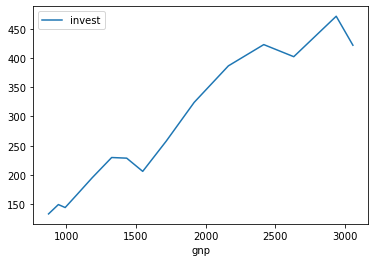

In [ ]:
data.plot("gnp","invest")

In [ ]:
data["invest"]=np.log(data["invest"])
data["gnp"]=np.log(data["gnp"])

In [ ]:
data

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50
5,1973,7.190224,5.437209,105.75,6.44
6,1974,7.268362,5.432411,115.08,7.83
7,1975,7.345494,5.328361,125.79,6.25
8,1976,7.448916,5.552572,132.34,5.50
9,1977,7.559195,5.781052,140.05,5.46


NOTE : Lorsque l’on traite des données monétaires, on travaille souvent en échelle logarithmique (pour
prendre en compte les différences d’échelle).
Les questions suivantes (3 à 6) doivent être réalisées par l’intermédiaire d’opérations élémentaires,
sans utiliser de librairies existantes.

### Question 3 
Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible.

### Équation Normale: 
\begin{equation}
Z^T Z\hat{\theta} = Z^TY
\end{equation}

In [ ]:
X=np.array(data["gnp"])
Y=np.array(data["invest"])
X=np.reshape(X,((len(X),1)))

## Fonction de concaténation de nos variables avec le vecteur de ones

def zezons(X):
    x=len(X)
    ones=np.ones((x,1))
    #print(x)
    return np.concatenate((ones,X),axis=1)

z=zezons(X)

In [ ]:
theta=np.linalg.inv(z.transpose().dot(z)).dot(z.transpose()).dot(Y)
print("Les valeurs de l'estimateur : ( Intercept : ",theta[0],"et la pente : ",theta[1],")")

Les valeurs de l'estimateur : ( Intercept :  -1.9635913352312762 et la pente :  1.0152814015990048 )


In [ ]:
### Écart-types et coefficients de détermination

# Calcul de Ypred

Ypred=X*theta[1] + theta[0]
data["invest_pred"]=Ypred

# Calcul de l'écart-type

X = data['gnp'].to_numpy().reshape(-1,1)
y = data['invest'].to_numpy().reshape(-1,1)

matrix_of_ones = np.ones((X.shape))

Z = np.concatenate((matrix_of_ones, X), axis=1)

def sigma_square(y, Z, theta, n):
    rank = np.linalg.matrix_rank(Z)
    norm = np.linalg.norm(y - Z.dot(theta))
    return norm**2 / (n - rank)
n = len(X)
X_bar = np.mean(X)
denum = np.sum((X - X_bar)**2)
sig_square = sigma_square(y, Z, thetas, len(y))

ecart_type_theta_0 = np.sqrt(sig_square * ( (1 / n) + X_bar**2 / denum ))
ecart_type_theta_1 = np.sqrt(sig_square / denum)
print('L\'écart-type de theta_0 est = ' + str(ecart_type_theta_0) + \
      '\nL\'écart-type de theta_1 est = ' + str(ecart_type_theta_1))


#print(Ypred.shape)
Ypred=np.reshape(Ypred,len(Y))
#print(Ypred.shape)
## calcul du coefficient de determinations

ssres=np.sum((Y-Ypred)**2)
sstos=np.sum((Y-np.mean(Y))**2)
r2s=1-ssres/sstos

print("La valeur du coefficient de détermination est ",r2s)


L'écart-type de theta_0 est = 0.4095472716623085
L'écart-type de theta_1 est = 0.05538306035485286
La valeur du coefficient de détermination est  0.9627572956057855


### Question 4
La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student
(t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

### La $T_{statistique}$ se calcule à l'aide de la formule
\begin{equation}
\hat{T_j} := \frac{\sqrt{n} \hat{\theta_j}}{\sqrt{\hat{\sigma}^2 (\hat{G}^{-1})_{j,j}}} ∼ T_{n-rang(Z)}
\end{equation}

In [ ]:
def calcul_g(z,n):
    return ((z.T.dot(z)).dot(1.0/n))

def sigma2(y,theta,z,n):
    r=np.linalg.matrix_rank(z)
    norm=(np.linalg.norm(y-z.dot(theta))**2)
    return norm/(n-r)

      
def stat(theta,g,sigma,n):
    num=(math.sqrt(n))*theta
    denum=math.sqrt(sigma*g)
    return (num/denum)

In [ ]:
import math
g_1=np.linalg.inv(calcul_g(z,len(Y)))
tstat=[]
Y=np.reshape(Y,len(Y))

sigma=sigma2(Y,theta,z,len(Y))

tstat.append(stat(theta[1],g_1[1][1],sigma,len(Y)))
print(tstat)

[18.33198445686759]


In [ ]:
from scipy import stats

p=2*(1-stats.t.cdf(tstat,13))
print("La valeur du test statistique est : ", tstat[0]," et la p-values est : ",p[0],\
      "avec un degré de test de Student de:",len(Y)-2)

La valeur du test statistique est :  18.33198445686759  et la p-values est :  1.1363709973011282e-10 avec un degré de test de Student de: 13


La valeur de notre p-value est $\textbf{1.1363709973011282e-10}$

Une p-value très petite signifie que la probabilté de faire une erreur en rejetant lhypothèse de départ (# theta1=0 #)
est faible.
On en déduit que l'hypothèse de départ peut etre rejetée et donc $\textbf{la nullité de notre coefficient theta1 est rejetée.}$

### Question 5
Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. 
Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals
for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CIpzq et PIpzq,
respectivement (avec les notations du polycopié, z “ p1, 1000qT).

In [ ]:
t1=theta[1]
t0=theta[0]
liste=[]

## Notre valeur 1000 dans d
d=np.log(1000)
liste.append(d)
liste=np.reshape(liste,(len(liste),1))

# Concaténation avec In
zz=zezons(liste)
zz=zz.T
print(d)
val=theta*zz


6.907755278982137


### Formule de calcul pour l'intervalle de confiance
\begin{equation}
CI(z) = z^T\hat{\theta} \pm t_{n - p - 1} (1 - \alpha / 2) \hat{\sigma}\sqrt{z^T (Z^TZ)^{-1} z}
\end{equation}

In [ ]:
ts=stats.t.ppf(1-0.05,13)
print(ts)
Z_to_predict=zz.T

sq=np.sqrt(zz.T.dot(np.linalg.inv(z.T.dot(z))).dot(zz))

sig=np.sqrt(sigma)
print(sig)
## Calcul des bornes de l'intervalle de confiance

high=zz.T.dot(theta)+ ts*sig*sq
low=zz.T.dot(theta)- ts*sig*sq

print("L'intervalle de confiance CI est [",low[0][0],",",high[0][0] ,"] ")

1.7709333959867988
0.08761471654613975
L'intervalle de confiance CI est [ 4.988222845970939 , 5.111225406662327 ] 


### Formule de calcul pour l'intervalle de prédiction
\begin{equation}
PI(z) = z^T\hat{\theta} \pm t_{n - p - 1} (1 - \alpha / 2) \hat{\sigma}\sqrt{1 + z^T (Z^TZ)^{-1} z}
\end{equation}

In [ ]:
sq=np.sqrt(1+ zz.T.dot(np.linalg.inv(z.T.dot(z))).dot(zz))

sig=np.sqrt(sigma)

## Calcul des bornes de l'intervalle de confiance

high=zz.T.dot(theta)+ ts*sig*sq
low=zz.T.dot(theta)- ts*sig*sq

print("L'intervalle de confiance PI est [",low[0][0],",",high[0][0] ,"] ")

L'intervalle de confiance PI est [ 4.882820023438511 , 5.216628229194755 ] 


### Question 6 
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de
log(GNP) comprises entre le maximum et le minimum observé sur les données)

In [ ]:


def confidance_interval(t, z, Z, thetas, sigma_square):
    start = (z.T.dot(thetas))
    end = t * math.sqrt(sigma_square) * \
          np.sqrt(z.T.dot(np.linalg.inv(Z.T.dot(Z))).dot(z))
    low = start - end
    high = start + end
    return low[0][0], high[0][0]

def prediction_interval(t, z, Z, thetas, sigma_square):
    start = (z.T.dot(thetas))
    end = t * math.sqrt(sigma_square) * \
          np.sqrt(1 + z.T.dot(np.linalg.inv(Z.T.dot(Z))).dot(z))
    low = start - end
    high = start + end
    return low[0][0], high[0][0]

def sigma_square(y, Z, theta, n):
    rank = np.linalg.matrix_rank(Z)
    norm = np.linalg.norm(y - Z.dot(theta))
    return norm**2 / (n - rank)

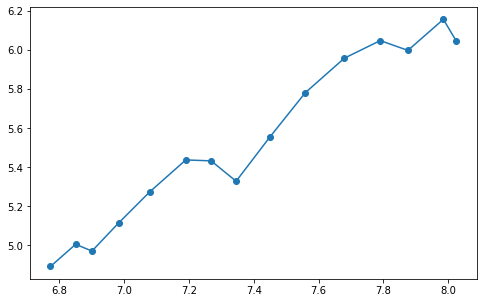

In [ ]:

plt.figure(figsize=(8,5))
ax = plt.axes()

ax.scatter(X, Y)
ax.plot(X, Y)
plt.show()


In [ ]:
X = data['gnp'].to_numpy().reshape(-1,1)
y = data['invest'].to_numpy().reshape(-1,1)

matrix_of_ones = np.ones((X.shape))

Z = np.concatenate((matrix_of_ones, X), axis=1)

def sigma_square(y, Z, theta, n):
    rank = np.linalg.matrix_rank(Z)
    norm = np.linalg.norm(y - Z.dot(theta))
    return norm**2 / (n - rank)

thetas = np.linalg.inv(Z.transpose().dot(Z)).dot(Z.transpose()).dot(y)
n = len(X)
X_bar = np.mean(X)
denum = np.sum((X - X_bar)**2)
sig_square = sigma_square(y, Z, thetas, len(y))

ecart_type_theta_0 = np.sqrt(sig_square * ( (1 / n) + X_bar**2 / denum ))
ecart_type_theta_1 = np.sqrt(sig_square / denum)
print('L\'écart-type de theta_0 est = ' + str(ecart_type_theta_0) + \
      '\nL\'écart-type de theta_1 est = ' + str(ecart_type_theta_1))

L'écart-type de theta_0 est = 0.4095472716623085
L'écart-type de theta_1 est = 0.05538306035485286


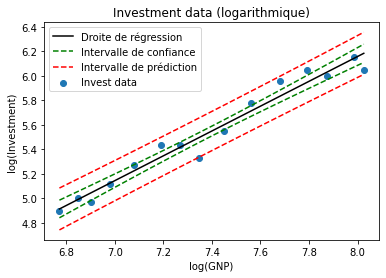

In [ ]:
xs = np.linspace(np.min(X), np.max(X), 50)
thetas = np.linalg.inv(Z.transpose().dot(Z)).dot(Z.transpose()).dot(y)

theta_0 = thetas[0][0]
theta_1 = thetas[1][0]

#theta_0 = theta[0]#[0]
#theta_1 = theta[1]#[0]
ys = theta_0 + theta_1 * xs
#y=Y

n = len(X)
X_bar = np.mean(X)
denum = np.sum((X - X_bar)**2)
sig_square = sigma_square(y, Z, thetas, len(y))

plt.figure()
plt.scatter(X, y, label='Invest data')
plt.plot(xs, ys, c='k', label='Droite de régression')
t = stats.t.ppf((1 - 0.1 / 2), len(y) - np.linalg.matrix_rank(Z))
#Affichage de l'intervalle de confiance
ys_min_conf = []
ys_max_conf = []
for x in xs:
    z1 = np.asarray([[1.0, x]]).T
    x_min, x_max = confidance_interval(t, z1, Z, thetas, sig_square)
    ys_min_conf.append(x_min)
    ys_max_conf.append(x_max)
plt.plot(xs, ys_min_conf, 'g--', label='Intervalle de confiance')
plt.plot(xs, ys_max_conf, 'g--')

#Affichage de l'intervalle de prédiction
ys_min_conf = []
ys_max_conf = []
for x in xs:
    z1 = np.asarray([[1.0, x]]).reshape(-1, 1)#.T
    x_min, x_max = prediction_interval(t, z1, Z, thetas, sig_square)
    ys_min_conf.append(x_min)
    ys_max_conf.append(x_max)
    
plt.plot(xs, ys_min_conf, 'r--', label='Intervalle de prédiction')
plt.plot(xs, ys_max_conf, 'r--')

plt.title('Investment data (logarithmique)')
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.legend(bbox_to_anchor=(0,1), loc='upper left')
plt.show()

### Question 7 
En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe
LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que
les valeurs calculées ici coïncident avec celles des questions précédentes.

In [ ]:
## Régression avec sklearn
print(Y)
reg=LinearRegression().fit(z,Y)
print("Avec le modèle Sklearn, le coefficient de détermination est :",reg.score(z,Y),", la valeur de l'intercept theta0 est :",\
      reg.intercept_,"la valeur de la pente theta1 est : ",reg.coef_[1],"\n")


print("Avec les calculs élémentaires, le coefficient de détermination est :",r2s,", la valeur de l'intercept theta0 est :",\
      t0,"la valeur de la pente theta1 est : ",t1)


d1=np.log(1000)
val=reg.predict([[1,d1]])
print(val)


[4.89260223 5.0059577  4.97120122 5.11439453 5.27299956 5.43720937
 5.4324111  5.32836149 5.55257191 5.78105211 5.95739057 6.04737218
 5.99719808 6.1559191  6.04476832]
Avec le modèle Sklearn, le coefficient de détermination est : 0.9627572956057856 , la valeur de l'intercept theta0 est : -1.9635913352301806 la valeur de la pente theta1 est :  1.0152814015988705 

Avec les calculs élémentaires, le coefficient de détermination est : 0.9627572956057855 , la valeur de l'intercept theta0 est : -1.9635913352312762 la valeur de la pente theta1 est :  1.0152814015990048
[5.04972413]


On retrouve donc les valeurs obtenues précédemment.

### Question 8
Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut
1000 (on donnera à ce point une couleur différente).

5.049724126316633


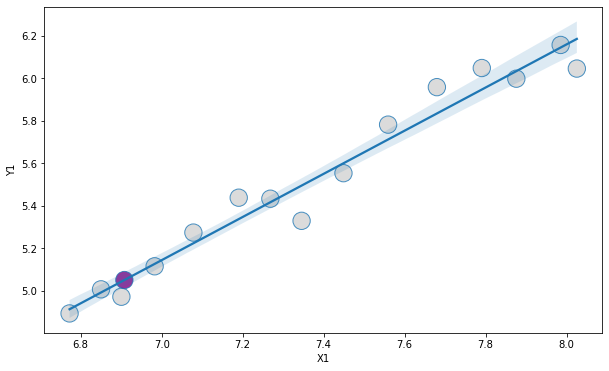

In [ ]:
plt.figure(figsize=((10,6)))
plt.xlabel('X1') 
plt.ylabel('Y1') 

d1=np.log(1000)
d2=d1*t1+t0
print(d2)
# Concaténation des valeurs prédictes à la fin des vecteurs X et Y
X1=np.append(X,[d1])
Y1=np.append(Y,[d2])

## Conditionnement de couleur pour la valeur prédicte pour GNP=1000
colors = ['purple' if (v.round(5) == d1.round(5)) else 'lightgray'
                  for v in X1]

ax = sns.regplot(x=X1,y= Y1, ci=90,marker='o',scatter_kws={'facecolors': colors,'s':300})
plt.show()

NOTE : On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique). 
    
Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations élémentaires, sans utiliser 
de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

### Question 9
Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram non standardisée (Z.T)Z. 
Est-elle de rang plein ?

In [ ]:

L=np.array(data["interest"]) 
L=np.reshape(L,(len(L),1))

X2=np.concatenate((X,L),axis=1)
z3=zezons(X2) 


## Nouvelles matrices z1 et z2 pour chacune des variable gnp et interest
z1=zezons(X)
z2=zezons(L)


# Fonction de calcul de la matrice de GRAM non standardisée
def calcul_gs(z):
    return (z.T.dot(z).dot(1.0/len(z)))
gs3=np.linalg.inv(calcul_gs(z3))

print("La matrice de GRAM non standardisée est la suivante :\n",gs3,"\n")


dett=np.linalg.det(gs3)


print("Le déterminant de la matrice de Gram calculée est : ",dett,". Il est différent de 0.\n")
print("On en déduit que la matrice de Gram non standardisée calculée est de plein rang\n")

La matrice de GRAM non standardisée est la suivante :
 [[ 8.03374345e+02 -1.23124121e+02  1.43190679e+01]
 [-1.23124121e+02  1.90722187e+01 -2.37445401e+00]
 [ 1.43190679e+01 -2.37445401e+00  4.31089208e-01]] 

Le déterminant de la matrice de Gram calculée est :  2.58379581307541 . Il est différent de 0.

On en déduit que la matrice de Gram non standardisée calculée est de plein rang



### Question 10 
Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écarttypes ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité
de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une
forme convenable. Discuter de la significativité des coefficients.

In [ ]:
### Estimation des coefficients

def pred_coef(z,Y):
    return np.linalg.inv(z.transpose().dot(z)).dot(z.transpose()).dot(Y)
    
theta_=pred_coef(z3,Y)

print("Les valeurs de l'estimateur : ( Intercept : ",theta_[0],", la pente p1 (variable gnp): ",theta_[1],\
      ") et la pente p2 (variable interest) : ",theta_[2])


Les valeurs de l'estimateur : ( Intercept :  -2.1804547259122575 , la pente p1 (variable gnp):  1.0512426913198811 ) et la pente p2 (variable interest) :  -0.006528879406102708


In [ ]:
### Calcul de leurs écart-types 
sigma=sigma2(Y,theta_,z3,len(Y))

Y=np.reshape(Y,(len(Y),1))

ect=[]

def calcul_gram2(z):
    return (z.T.dot(z))
gr=np.linalg.inv(calcul_gram2(z3))



ect.append(np.sqrt(sigma*gr[0][0]))
ect.append(np.sqrt(sigma*gr[1][1]))
ect.append(np.sqrt(sigma*gr[2][2]))


print("Les nouveaux écart-types pour chaque coefficients sont :",ect[0],ect[1],ect[2])

### Calcul du nouvel Ypred

Ypred_=(X2[:,0]*theta_[1] + X2[:,1]*theta_[2] + theta_[0]).reshape(-1,1)

data["invest_pred"]=Ypred_


## calcul du coefficient de determination

ssres=np.sum((Y-Ypred_)**2)
sstos=np.sum((Y-np.mean(Y))**2)
r2s1=1-ssres/sstos

print("La valeur du coefficient de détermination est ",r2s1)

Les nouveaux écart-types pour chaque coefficients sont : 0.6623991977963694 0.10206137806192318 0.01534420506560421
La valeur du coefficient de détermination est  0.9633108306726246


In [ ]:
### Test de student pour chaque coefficient

tstat=[]

theta_=theta_.reshape(-1,1)

### test de Student pour le coefficient de GNP

Y=np.reshape(Y,(len(Y),1))
sigma=sigma2(Y,theta_,z3,len(Y))


tstat.append(stat(theta_[0][0], gs3[0][0], sigma, len(Y)))
tstat.append(stat(theta_[1][0], gs3[1][1], sigma, len(Y)))
tstat.append(stat(theta_[2][0], gs3[2][2], sigma, len(Y)))

#print(tstat)

In [ ]:
from scipy import stats


rang=np.linalg.matrix_rank(z1)
print(rang)
for i in range(0,3):
    p=2*(1-stats.t.cdf(np.abs(tstat[i]),12))
    print("La valeur du test statistique est : ", tstat[i]," et la p-values est : ",p,\
          "avec un degré de test de Student de:",len(Y)-3,'\n')

2
La valeur du test statistique est :  -3.291753270786138  et la p-values est :  0.006438367050918492 avec un degré de test de Student de: 12 

La valeur du test statistique est :  10.300102852639247  et la p-values est :  2.5995168484449493e-07 avec un degré de test de Student de: 12 

La valeur du test statistique est :  -0.4254947961258704  et la p-values est :  0.6780071418822728 avec un degré de test de Student de: 12 



### Question 11 
Pour les valeurs de GNP 1000 et interest 10, i.e., z =(1, 1000, 10)T , prédire log(investment) et
donner les intervalles de confiance CI et PI au niveau 99.9%.



In [ ]:
liste=[]

## Notre valeur 1000 dans d
d1=1000
d2=10
zz=np.array([1,np.log(1000),10])


zz=np.reshape(zz,(len(zz),1))

zz=zz.T

# Calcul de la prédiction de
val=zz.dot(theta_)

print("La valeur prédicte de log(investment) est :",val[0][0],'\n')

ts2=np.abs(stats.t.ppf(1-0.0005,12))



sq=np.sqrt(zz.dot(np.linalg.inv(z3.T.dot(z3))).dot(zz.T))
sig=np.sqrt(sigma)
print(sq)
print(sig)
print(zz.dot(theta_))
print(ts2)
## Calcul des bornes de l'intervalle de confiance

high=zz.dot(theta_)+ ts2*sig*sq
low=zz.dot(theta_)- ts2*sig*sq

print("L'intervalle de confiance CI est [",low[0][0],",",high[0][0] ,"] ")



La valeur prédicte de log(investment) est : 5.015983730483013 

[[0.96158644]]
0.09051205972421458
[[5.01598373]]
4.317791283606267
L'intervalle de confiance CI est [ 4.64018403668841 , 5.391783424277616 ] 


In [ ]:
sq=np.sqrt(1+ zz.dot(np.linalg.inv(z3.T.dot(z3))).dot(zz.T))

sig=np.sqrt(sigma)

## Calcul des bornes de l'intervalle de confiance

high=zz.dot(theta_)+ ts2*sig*sq
low=zz.dot(theta_)- ts2*sig*sq

print("L'intervalle de prediction PI est [",low[0][0],",",high[0][0] ,"] ")

L'intervalle de prediction PI est [ 4.473803343640594 , 5.558164117325432 ] 


### Question 12
Sur un même graphe à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment),
tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance
à 99.9% (ces surfaces seront tracées sur le domaine de définition des données). On pourra par exemple
utiliser la librairie mplot3D

In [ ]:
def t_I_conf(alpha, deg):
    # renvoie l'intervalle de confiance de niveau alpha pour une Student de degré deg
    I = [(1 - alpha) / 2., 1 - (1 - alpha) / 2.]
    t_I = stat.t.ppf(I, deg)
    return t_I

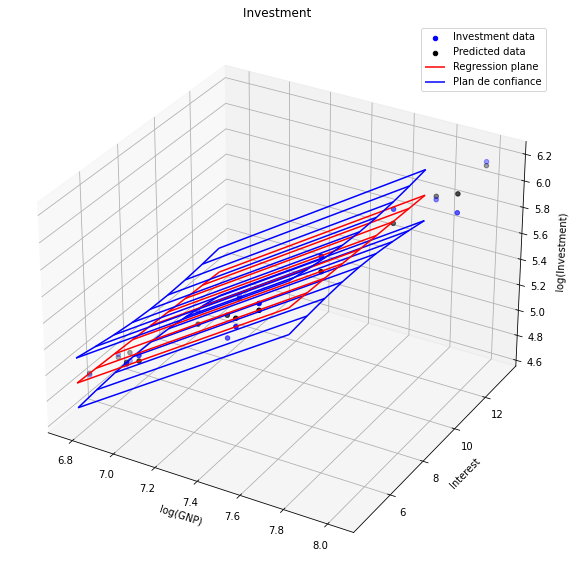

In [ ]:
alpha=0.001

### Matrice Z

L=np.array(data["interest"]) 
L=np.reshape(L,(len(L),1))

X2=np.concatenate((X,L),axis=1)
z3=zezons(X2) 

## T stat
t = stats.t.ppf((1 - alpha / 2), len(y) - np.linalg.matrix_rank(z3))

def confidance_interval(t, z, Z, thetas, sigma_square):
    start = (z.T.dot(thetas))
    end = t * math.sqrt(sigma_square) * \
          np.sqrt(z.T.dot(np.linalg.inv(Z.T.dot(Z))).dot(z))
    low = start - end
    high = start + end
    return low[0][0], high[0][0]


# Fonction de calcul de la matrice de GRAM non standardisée

def calcul_gs(z):
    return (z.T.dot(z).dot(1.0/len(z)))
gs3=np.linalg.inv(calcul_gs(z3))

# Calcul de theta_

def pred_coef(z,Y):
    return np.linalg.inv(z.transpose().dot(z)).dot(z.transpose()).dot(Y)
    
theta_=pred_coef(z3,Y)

### Calcul de sigma

sig_square=sigma2(Y,theta_,z3,len(Y))

# Calcul de la prédiction de
val=zz.dot(theta_)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


# Plot des points

ax.scatter(z3[:, 1], z3[:, 2], Y, c='b', label='Investment data')
predY = theta_[0] + theta_[1] * z3[:, 1] + theta_[2] * z3[:, 2]
ax.scatter(z3[:, 1], z3[:, 2], predY, c='k', label='Predicted data')

# Plan de régression
x3 = np.arange(np.min(z3[:, 1]), np.max(z3[:, 1]))
y3 = np.arange(np.min(z3[:, 2]), np.max(z3[:, 2]))
x3, y3 = np.meshgrid(x3, y3)

surf3d = theta_[0] + theta_[1] * x3 + theta_[2] * y3
ax.plot_wireframe(x3, y3, surf3d, color='r', label='Regression plane')

# Plan de confiance
X3=np.concatenate((x3.reshape(-1,1),y3.reshape(-1,1)),axis=1)
Zconf=zezons(X3)
#print(Zconf)#np.array([np.ones(x3.shape[0] * x3.shape[1]), x3.ravel(), y3.ravel()]).T
zs_min_conf = []
zs_max_conf = []

for z in Zconf:
    z = z.reshape(-1, 1)
    blow, bhigh = confidance_interval(t, z, Zconf, theta_, sig_square)
    zs_min_conf.append(blow)
    zs_max_conf.append(bhigh)

zs_min_conf = np.array(zs_min_conf).reshape(-1,2)
zs_max_conf = np.array(zs_max_conf).reshape(-1,2)

ax.plot_wireframe(x3, y3, zs_min_conf, color='b', label='Plan de confiance')
ax.plot_wireframe(x3, y3, zs_max_conf, color='b')

ax.set_title('Investment ')
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest')
ax.set_zlabel('log(Investment)')
ax.legend()
plt.show() 

### Question 13 
En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest
10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire.
Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [ ]:
model = LinearRegression().fit(z3, Y)

prediction_1000 = model.predict(zz)

print('Model Intercept :\t\t' + str(model.intercept_[0]) + \
      '\nNotre Intercept (theta_0) :\t' + str(theta_[0]))

print('\nLes pentes du modèle sont :\t' + str(model.coef_[0][1]) + \
      ', ' + str(model.coef_[0][2]) + \
      '\nNos Pentes sont :\t\t' + str(theta_[1]) + ', ' + str(theta_[2]))

print('\nCoefficient de determination du modèle :\t' + str(model.score(z3, Y)) + \
      '\nNotre coefficient de determination :\t\t' + str(r2s1))

print('\nLe modèlere à prédit pour que X = 1000 que y est :\t' + str(prediction_1000[0][0]) + \
      '\nNotre modèle a trouvé que y est :\t\t\t' + str(val[0]))

Model Intercept :		-2.1804547259114013
Notre Intercept (theta_0) :	[-2.18045473]

Les pentes du modèle sont :	1.0512426913196595, -0.0065288794060684874
Nos Pentes sont :		[1.05124269], [-0.00652888]

Coefficient de determination du modèle :	0.9633108306726244
Notre coefficient de determination :		0.9633108306726246

Le modèlere à prédit pour que X = 1000 que y est :	5.015983730482681
Notre modèle a trouvé que y est :			[5.01598373]


### Question 14 
Charger le dataset sur le diabète à partir de sklearn (load_diabetes(return_X_y=True)) et soit X
la troisième colonne des données chargées (la matrice des covariables est constituée uniquement de la
variable 3 du dataset original). 


Nous allons calculer approximativement les intervalles de confiance
(IC) pour le coefficient θ1 par Bootstrapping.

‚ Donner le coefficient OLS pour la pente, θ1

. Coder manuellement l’expression des intervalles de confiance et évaluez-la pour α “ 0, 05 (l’utilisation de statsmodel n’est pas autorisée).

Nous désignons la concaténation de X et y par Xy. Générer k échantillons bootstrap à partir de Xy, pour k P t100, 300, 600, 1000u. Un échantillon bootstrap a la même dimension que Xy et est formé de points de données (lignes) tirés, avec remplacement, de Xy.

‚ (Pour chaque valeur de k) (i) Estimez le coefficient θ1 pour chaque échantillon bootstrap avec
sklearn, (ii) obtenez une approximation de l’IC en obtenant les quantiles α et 1´α des valeurs
de l’étape (i).

. Tracer, pour chaque valeur de k, la différence entre l’IC approximé à l’étape précédente et l’IC
réel.

. L’IC augmente-t-il avec α ?



In [ ]:
### Calcul du coefficient de pente theta[1]

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:,2].reshape(-1, 1)
y = y.reshape(-1, 1)

"""scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)"""

matrix_of_ones = np.ones((X.shape[0], 1))
Z = np.concatenate((matrix_of_ones, X), axis = 1)

# On retrouve la valeur de theta_1 à l'aide de l'équation normale
thetas = np.linalg.inv(Z.transpose().dot(Z)).dot(Z.transpose()).dot(y)

theta_0 = thetas[0][0]
theta_1 = thetas[1][0]
print('La valeur de la pente theta_1 est égal à : ' + str(theta_1))

La valeur de la pente theta_1 est égal à : 949.4352603839496


Coder manuellement l’expression des intervalles de confiance et évaluez-la pour α “ 0, 05 

In [ ]:
t = stats.t.ppf((1 - 0.05 / 2), len(y) - np.linalg.matrix_rank(Z))

def confidance_interval(t, z, Z, thetas, sigma_square):
    start = (z.T.dot(thetas))
    end = t * math.sqrt(sigma_square) * \
          np.sqrt(z.T.dot(np.linalg.inv(Z.T.dot(Z))).dot(z))
    low = start - end
    high = start + end
    return low[0][0], high[0][0]

def prediction_interval(t, z, Z, thetas, sigma_square):
    start = (z.T.dot(thetas))
    end = t * math.sqrt(sigma_square) * \
          np.sqrt(1 + z.T.dot(np.linalg.inv(Z.T.dot(Z))).dot(z))
    low = start - end
    high = start + end
    return low[0][0], high[0][0]

def sigma_square(y, Z, theta, n):
    rank = np.linalg.matrix_rank(Z)
    norm = np.linalg.norm(y - Z.dot(theta))
    return norm**2 / (n - rank)

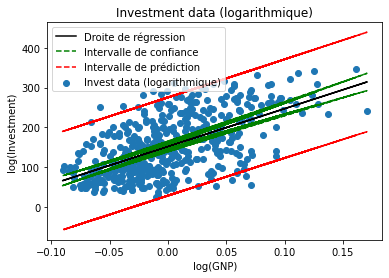

In [ ]:
ys = theta_0 + theta_1 * X
sig_square = sigma_square(y, Z, thetas, len(y))

plt.figure()
plt.scatter(X, y, label='Invest data (logarithmique)')
plt.plot(X, ys, c='k', label='Droite de régression')

#Affichage de l'intervalle de confiance
ys_min_conf = []
ys_max_conf = []

for z in Z:
    z = z.reshape(-1, 1)
    low, high = confidance_interval(t, z, Z, thetas, sig_square)
    ys_min_conf.append(low)
    ys_max_conf.append(high)

plt.plot(X, ys_min_conf, 'g--', label='Intervalle de confiance')
plt.plot(X, ys_max_conf, 'g--')

#Affichage intervalle de prédiction
ys_min_conf = []
ys_max_conf = []

for z in Z:
    z = z.reshape(-1, 1)
    low, high = prediction_interval(t, z, Z, thetas, sig_square)
    ys_min_conf.append(low)
    ys_max_conf.append(high)

plt.plot(X, ys_min_conf, 'r--', label='Intervalle de prédiction')
plt.plot(X, ys_max_conf, 'r--')

plt.title('Investment data (logarithmique)')
plt.xlabel('log(GNP)')
plt.ylabel('log(Investment)')
plt.legend(bbox_to_anchor=(0,1), loc='upper left')
plt.show()

In [ ]:
t = stats.t.ppf((1 - 0.025), len(y) - np.linalg.matrix_rank(Z))
def calcul_gram2(z):
    return (z.T.dot(z))
gr=np.linalg.inv(calcul_gram2(Z))

intervalle=[]
## Calcul des bornes de l'intervalle de confiance

low=theta_1 - t* (np.sqrt(sig_square*gr[1][1])/np.sqrt(len(Z))) 
high=theta_1 + t*(np.sqrt(sig_square*gr[1][1])/np.sqrt(len(Z))) 
intervalle.append(low)
intervalle.append(high)
print("L'intervalle de confiance CI réel est [",low,",",high ,"] ")

L'intervalle de confiance CI réel est [ 943.59115152107 , 955.2793692468293 ] 


Nous désignons la concaténation de X et y par Xy. Générer k échantillons bootstrap à partir de Xy, pour k P t100, 300, 600, 1000u. Un échantillon bootstrap a la même dimension que Xy et est formé de points de données (lignes) tirés, avec remplacement, de Xy.

‚ (Pour chaque valeur de k) (i) Estimez le coefficient θ1 pour chaque échantillon bootstrap avec sklearn, (ii) obtenez une approximation de l’IC en obtenant les quantiles α et 1´α des valeurs de l’étape (i).



.Calculer, pour chaque valeur de k, la différence entre l’IC approximé à l’étape précédente et l’IC réel.


In [ ]:
Xy = np.concatenate((X, y), axis = 1)

#Creation des échantillons bootstrap

iterations = [100, 300, 600, 1000]

def bootstrapf2(Xy , iterations):
    
    #Xy = np.concatenate((X, y), axis = 1)
    
    coef_means = []
    intervalles = []
    lows=[]
    highs=[]
    for k in iterations:

        coefficients = []
        coefficients0=[]
        coefficients1=[]
        for i in range(k):
            
            # Tirage aléatoire
            tmp = np.array(random.choices(Xy, k=Xy.shape[0]))
            X_sample = tmp[:,0].reshape(-1, 1)
            #Z_sample = np.concatenate((np.ones((X_sample.shape[0], 1)), X_sample), axis = 1)
            y_sample = tmp[:,1].reshape(-1, 1)

            # i) La pente
            model = LinearRegression().fit(X_sample, y_sample)
            t1=np.array(model.coef_[0]).reshape(1,-1)
            coefficients1.append(t1[0])
        
        # ii) Les intervalles de confiance
        low=np.quantile(coefficients1,0.05/2)
        lows.append(low)
        high = np.quantile(coefficients1,1-(0.05/2))
        highs.append(high)
        print(f"L'intervalle de confiance  est [{low} , {high}]","pour k=",k,"\n")
        coef_means.append(np.mean(coefficients1))
        intervalles.append((low,high))
    return coef_means,lows,highs

        
theta1, lows, highs=bootstrapf2(Xy , iterations)

print("La pente obtenue en fonction des k vaut: ",theta1,"\n")


L'intervalle de confiance  est [832.071618480455 , 1054.9699958845858] pour k= 100 

L'intervalle de confiance  est [841.63113291495 , 1052.4415360025712] pour k= 300 

L'intervalle de confiance  est [831.358686927241 , 1052.0062668281867] pour k= 600 

L'intervalle de confiance  est [834.3255817938963 , 1053.8738739742407] pour k= 1000 

La pente obtenue en fonction des k vaut:  [955.7762297945391, 950.4627669859809, 950.1889242861707, 947.3952612258958] 



In [ ]:
def confidance_interval(t, z, Z, thetas, sigma_square):
    start = (z.T.dot(thetas))
    end = t * math.sqrt(sigma_square) * \
          np.sqrt(z.T.dot(np.linalg.inv(Z.T.dot(Z))).dot(z))
    low = start - end
    high = start + end
    return low[0][0], high[0][0]

Exprimons les écarts entre les intervalles de confiances bootstrap et l'intervalle confiance

In [ ]:


iterations = [100, 300, 600, 1000]
for i in range(len(lows)):
    print("Les bornes de l'intervalle de confiance de bootstrap pour k =",iterations[i]," est : borne inf : ",lows[i]," borne sup: ",highs[i],\
          "avec une pente moyenne de ",theta1[i],"\n")
    print("La différence entres les bornes de l'intervalle de confiance réel et celui de bootstrap pour k =",iterations[i]," est : borne inf : ",intervalle[0]-lows[i]," borne sup: ",intervalle[1]-highs[i],"\n")

Les bornes de l'intervalle de confiance de bootstrap pour k = 100  est : borne inf :  832.071618480455  borne sup:  1054.9699958845858 avec une pente moyenne de  955.7762297945391 

La différence entres les bornes de l'intervalle de confiance réel et celui de bootstrap pour k = 100  est : borne inf :  111.51953304061499  borne sup:  -99.69062663775651 

Les bornes de l'intervalle de confiance de bootstrap pour k = 300  est : borne inf :  841.63113291495  borne sup:  1052.4415360025712 avec une pente moyenne de  950.4627669859809 

La différence entres les bornes de l'intervalle de confiance réel et celui de bootstrap pour k = 300  est : borne inf :  101.96001860612  borne sup:  -97.16216675574185 

Les bornes de l'intervalle de confiance de bootstrap pour k = 600  est : borne inf :  831.358686927241  borne sup:  1052.0062668281867 avec une pente moyenne de  950.1889242861707 

La différence entres les bornes de l'intervalle de confiance réel et celui de bootstrap pour k = 600  est : bo

La longueur de l'intervalle de confiance CI en fonction de la valeur de alpha est : 9.80271889339565 

La longueur de l'intervalle de confiance CI en fonction de la valeur de alpha est : 4.014564424668606 

La longueur de l'intervalle de confiance CI en fonction de la valeur de alpha est : 1.8961609851578487 

La longueur de l'intervalle de confiance CI en fonction de la valeur de alpha est : 0.7477498120035762 



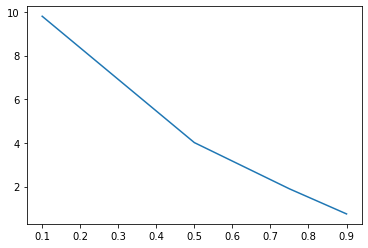

In [ ]:
alpha=[0.1,0.5,0.75,0.9]

def plot_alpha_CI(alpha,Z,y,sig_square,gr):
    ecart=[]
    for i in range(len(alpha)):
        
        t = stats.t.ppf((1 - alpha[i]/2), len(y) - np.linalg.matrix_rank(Z))
        intervalle=[]
        ## Calcul des bornes de l'intervalle de confiance

        low=theta_1 - t* (np.sqrt(sig_square*gr[1][1])/np.sqrt(len(Z))) 
        high=theta_1 + t*(np.sqrt(sig_square*gr[1][1])/np.sqrt(len(Z))) 
        intervalle.append(low)
        intervalle.append(high)
        ecart.append(high - low)
        print("La longueur de l'intervalle de confiance CI en fonction de la valeur de alpha est :",ecart[i],"\n")
    plt.plot(alpha,ecart)
    plt.show()
    
plot_alpha_CI(alpha,Z,y,sig_square,gr)

On constate que la taille de l'intervalle de confiance diminue lorsque la valeur de alpha augmente.